[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-510/blob/master/open-data-analysis-input.ipynb)


# 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/dataset/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.
* 처음으로 파일데이터에서 `상가(상권)정보_의료기관_201909`를 다운로드 받아봅니다.

## 필요한 라이브러리 불러오기

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

## 시각화를 위한 폰트 설정

In [4]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

# import koreanize_matplotlib



In [5]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic')
# plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
# retina 대신 svg 등의 설정을 할 수도 있으며
# 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## 데이터 로드하기
* 판다스에서 데이터를 로드할 때는 read_csv를 사용합니다.
* 데이터를 로드해서 df라는 변수에 담습니다.
* 그리고 shape 를 통해 데이터의 갯수를 찍습니다. 결과는 (행, 열) 순으로 출력됩니다.

In [6]:
df = pd.read_csv("data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)
#행, 열을 찍어서 데이터의 크기를 알 수 있음
df.shape

(91335, 39)

## 데이터 미리보기
* head, tail 을 통해 데이터를 미리 볼 수 있습니다.

In [7]:
#head 로 데이터를 미리보기 합니다.
df.head(3)

상가업소번호        상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0  19956873     하나산부인과  NaN         S       의료       S01       병원    S01B10   
1  20024149   타워광명내과의원  NaN         S       의료       S01       병원    S01B07   
2  20152277  조정현신경외과의원  NaN         S       의료       S01       병원    S01B15   

  상권업종소분류명 표준산업분류코드  ...                     건물관리번호      건물명  \
0     산부인과   Q86201  ...  4127310900110810000010857  산호한양아파트   
1    내과/외과   Q86201  ...  1168011800104670014000001      NaN   
2     신경외과   Q86201  ...  4139013200117400001017064    한라프라자   

                 도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도  \
0   경기도 안산시 단원구 달미로 10  425764.0  15236.0  NaN  NaN  NaN  126.814295   
1  서울특별시 강남구 언주로30길 39  135270.0   6292.0  NaN    4  NaN  127.053198   
2    경기도 시흥시 중심상가로 178  429450.0  15066.0  NaN  NaN  NaN  126.734841   

          위도  
0  37.336344  
1  37.488742  
2  37.344955  

[3 rows x 39 columns]

In [8]:
# tail 로 마지막 부분에 있는 데이터를 불러옵니다.
df.tail(1)

상가업소번호           상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
91334  16109073  천안김안과천안역본점의원  NaN         S       의료       S01       병원   

      상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호  건물명  \
91334    S01B13     안과의원   Q86201  ...  4413110700102660017016314  김안과   

                     도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도  \
91334  충청남도 천안시 동남구 중앙로 92  330952.0  31127.0  NaN  NaN  NaN  127.152651   

             위도  
91334  36.80664  

[1 rows x 39 columns]

In [9]:
# sample 로 미리보기를 합니다.
df.sample()

상가업소번호    상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
35348  27509477  태평양약국  NaN         S       의료       S02   약국/한약방    S02A01   

      상권업종소분류명 표준산업분류코드  ...                     건물관리번호  건물명  \
35348       약국   G47811  ...  3111010500100950004008242  NaN   

                   도로명주소     구우편번호    신우편번호  동정보  층정보  호정보         경도  \
35348  울산광역시 중구 시계탑거리 27  681190.0  44531.0  NaN  NaN  NaN  129.32193   

              위도  
35348  35.554072  

[1 rows x 39 columns]

## 데이터 요약하기

### 요약정보

In [10]:
# info로 데이터의 요약을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### 컬럼명 보기

In [11]:
# 컬럼명만 출력해 봅니다.
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 데이터 타입

In [12]:
# 데이터 타입만 출력합니다.
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 결측치

In [72]:
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<Axes: >

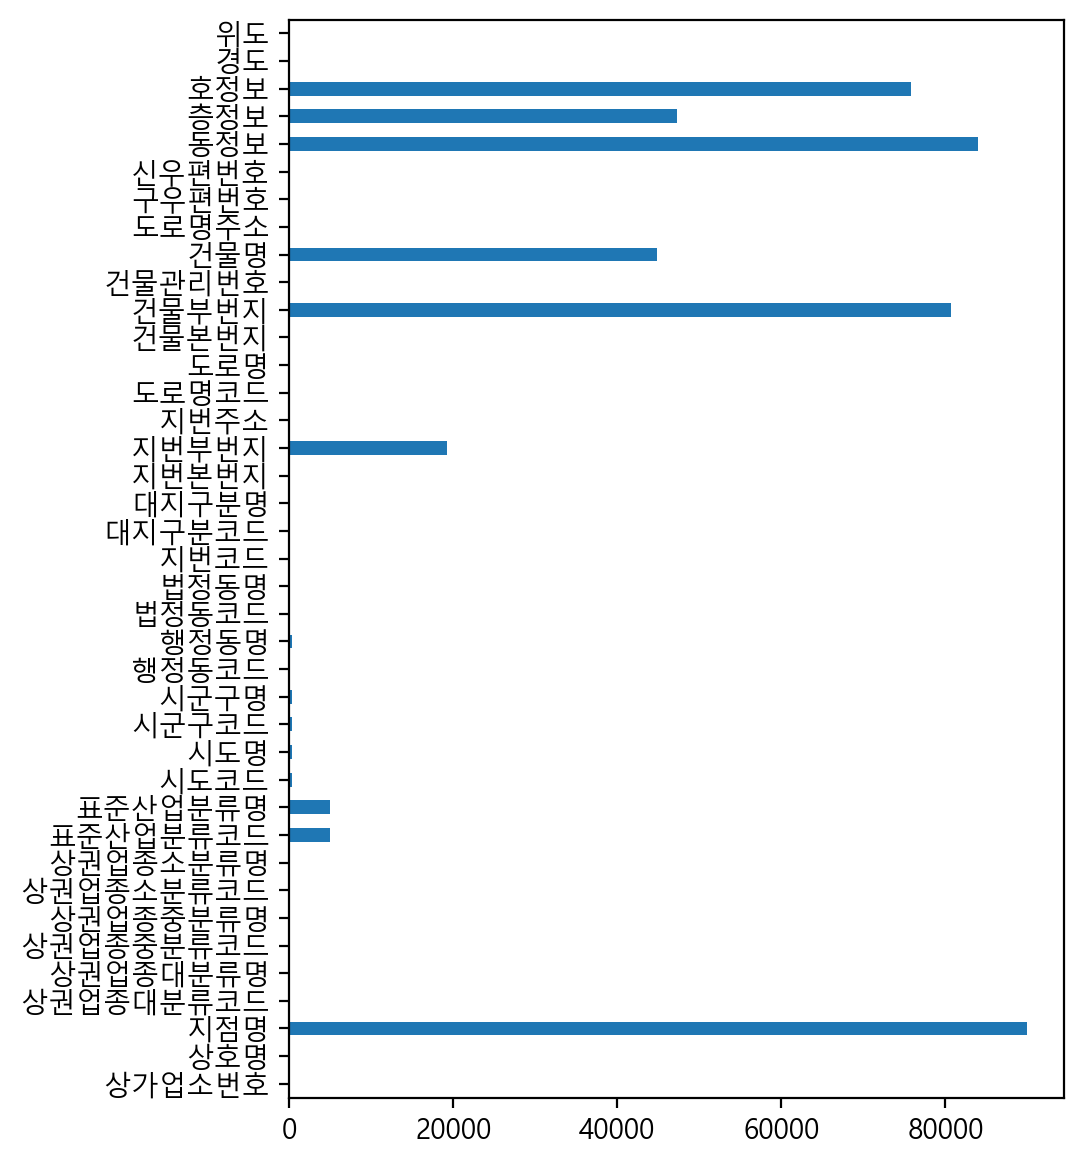

In [80]:
# 위에서 구한 결측치를 .plot.bar 를 통해 막대그래프로 표현합니다.``
null_count.plot.barh(figsize = (5,7))

In [85]:
# 위에서 계산한 결측치 수를 reset_index 를 통해 데이터프레임으로 만들어 줍니다.
# df_null_count 변수에 결과를 담아서 head 로 미리보기를 합니다.
df_null_count = null_count.reset_index()
df_null_count.head()

index      0
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

## 컬럼명 변경하기

In [87]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수"로 변경해 줍니다.
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

컬럼명   결측치수
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

## 정렬하기

In [93]:
# df_null_count 데이터프레임에 있는 결측치수 컬럼을 sort_values 를 통해 정렬해서
# 결측치가 많은 순으로 상위 10개만 출력합니다.

df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head(10)

## 특정 컬럼만 불러오기

In [92]:
# 지점명 컬럼을 불러옵니다.
df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [94]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담습니다.
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류명',
 '표준산업분류코드',
 '시군구코드']

In [95]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옵니다.
df[drop_columns].head()

지점명  동정보  건물부번지  호정보  층정보      건물명  지번부번지         표준산업분류명 표준산업분류코드    시군구코드
0  NaN  NaN    NaN  NaN  NaN  산호한양아파트    NaN           일반 의원   Q86201  41273.0
1  NaN  NaN    NaN  NaN    4      NaN   14.0           일반 의원   Q86201  11680.0
2  NaN  NaN    NaN  NaN  NaN    한라프라자    1.0           일반 의원   Q86201  41390.0
3  NaN  NaN    NaN  NaN    5      NaN    1.0             NaN      NaN  26500.0
4  수지점  NaN    NaN  NaN    1      NaN    2.0  의약품 및 의료용품 소매업   G47811  41465.0

## 제거하기

In [98]:
print(df.shape)
df = df.drop(drop_columns, axis=1)
print(df.shape)


(91335, 39)
(91335, 29)


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도코드       90956 non-null  float64
 9   시도명        90956 non-null  object 
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## 기초 통계값 보기

### 기초 통계 수치

In [120]:
# 평균값


In [121]:
# 중앙값


In [122]:
# 최댓값


In [123]:
# 최솟값


In [124]:
# 개수


### 기초통계값 요약하기 - describe

describe 를 사용하면 데이터를 요약해 볼 수 있습니다.
기본적으로 수치형 데이터를 요약해서 보여줍니다.
데이터의 갯수, 평균, 표준편차, 최솟값,
1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.

In [125]:
# 위도를 describe로 요약해 봅니다.
df["위도"].dtypes

dtype('float64')

In [134]:
# 2개의 컬럼을 describe 로 요약합니다.
df["위도"].mean()
df["위도"].median()
df["위도"].max()
df["위도"].min()
df["위도"].count()

np.int64(91335)

In [137]:
# describe로 문자열 데이터타입의 요약을 봅니다.
df["위도"].describe()
df[["위도", "경도"]].describe()

위도            경도
count  91335.000000  91335.000000
mean      36.624711    127.487524
std        1.041361      0.842877
min       33.219290    124.717632
25%       35.811830    126.914297
50%       37.234652    127.084550
75%       37.507463    128.108919
max       38.499659    130.909912

### 중복제거한 값 보기
* unique 로 중복을 제거한 값을 보고 nunique 로 갯수를 세어봅니다.

In [138]:
# "상권업종대분류명"
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [140]:
df["상권업종대분류명"].nunique()

1

In [141]:
# "상권업종중분류명"
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [142]:
df["상권업종중분류명"].nunique()

5

In [143]:
# "상권업종소분류명"
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [144]:
df["상권업종소분류명"].nunique()

34

In [147]:
# nunique 대신 len 을 사용할 수도 있습니다.
df["상권업종소분류명"].len

AttributeError: 'Series' object has no attribute 'len'

### 그룹화된 요약값 보기 - value_counts
* value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.

In [152]:
# value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.
# 시도코드를 세어봅니다.
df["시도코드"].value_counts()

시도코드
41.0    21374
11.0    18943
26.0     6473
48.0     4973
28.0     4722
27.0     4597
47.0     4141
45.0     3894
44.0     3578
46.0     3224
29.0     3214
30.0     3067
43.0     2677
42.0     2634
31.0     1997
50.0     1095
36.0      353
Name: count, dtype: int64

In [153]:
# 시도명을 세어봅니다.
df["시도명"].value_counts()

시도명
경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: count, dtype: int64

In [35]:
# normalize=True 옵션을 사용하면 비율을 구할 수 있습니다.
city_normalize = df["시도명"].value_counts(normalize=True)

<Axes: ylabel='시도명'>

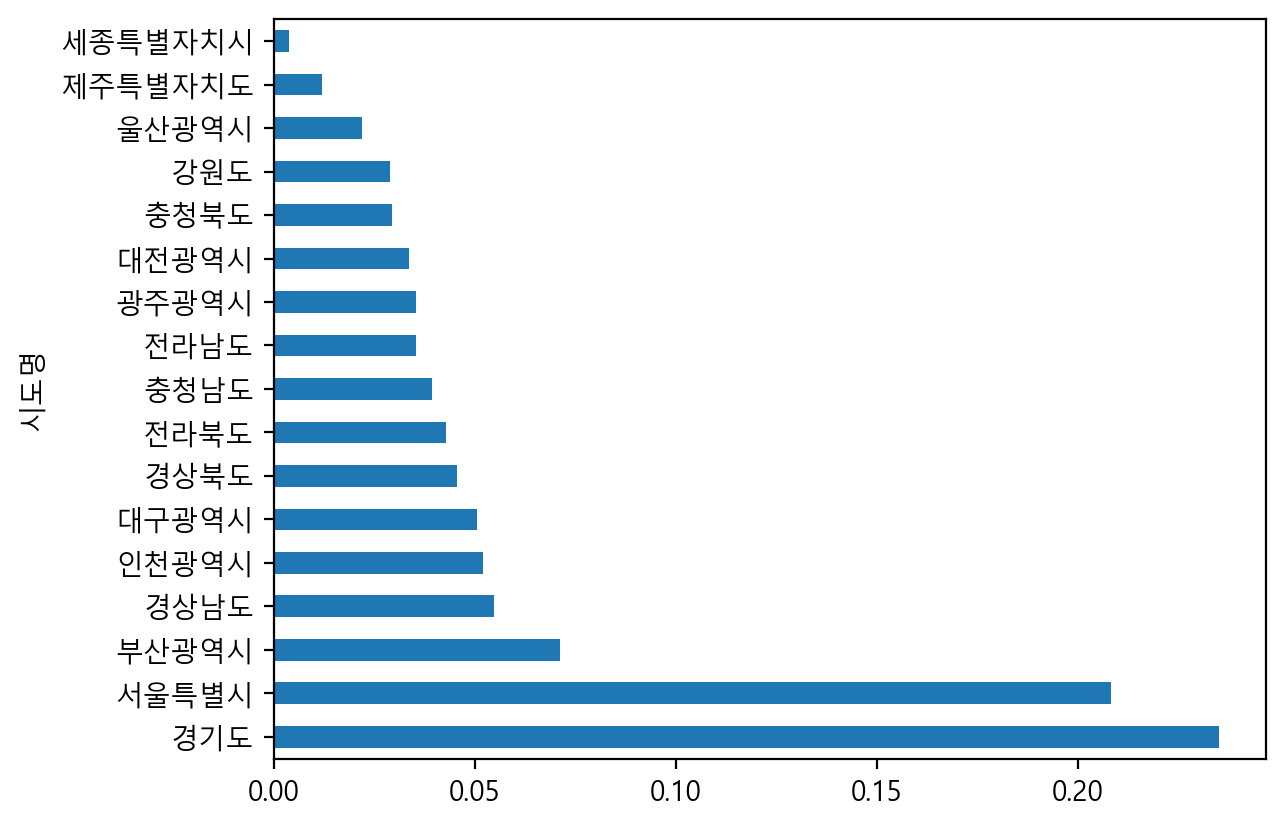

In [155]:
# Pandas 에는 plot기능을 내장하고 있습니다.
# 위에서 분석한 시도명 수를 막대그래프로 표현해 봅니다.
city_normalize.plot.barh()

<Axes: ylabel='proportion'>

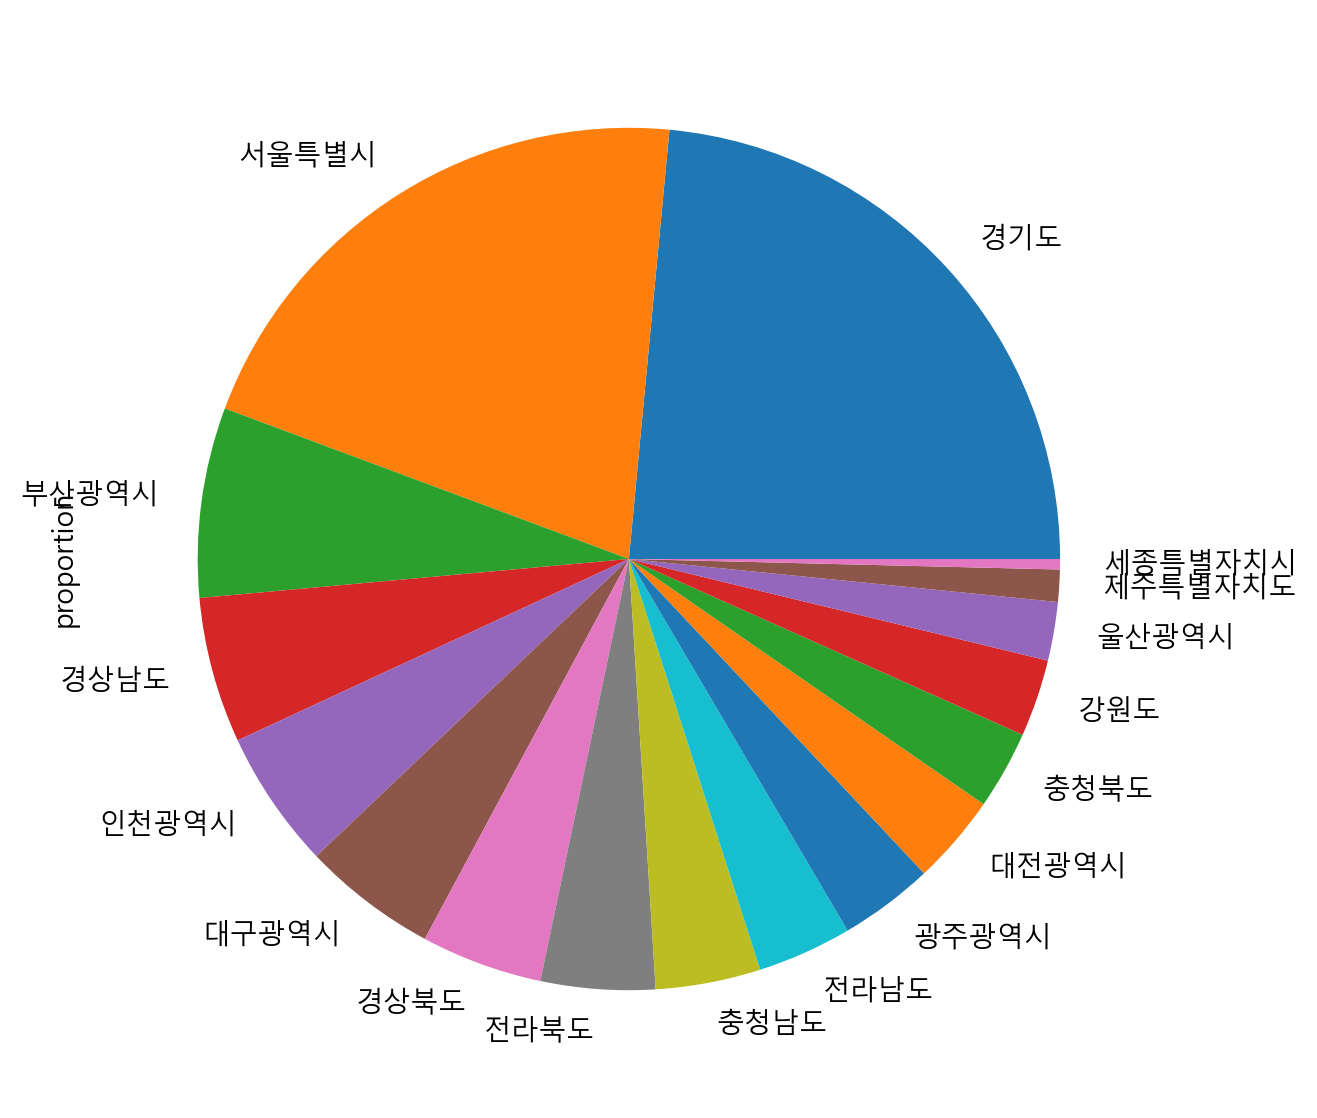

In [166]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.
city_normalize.plot.pie(figsize=(7,7))

<Axes: xlabel='count', ylabel='시도명'>

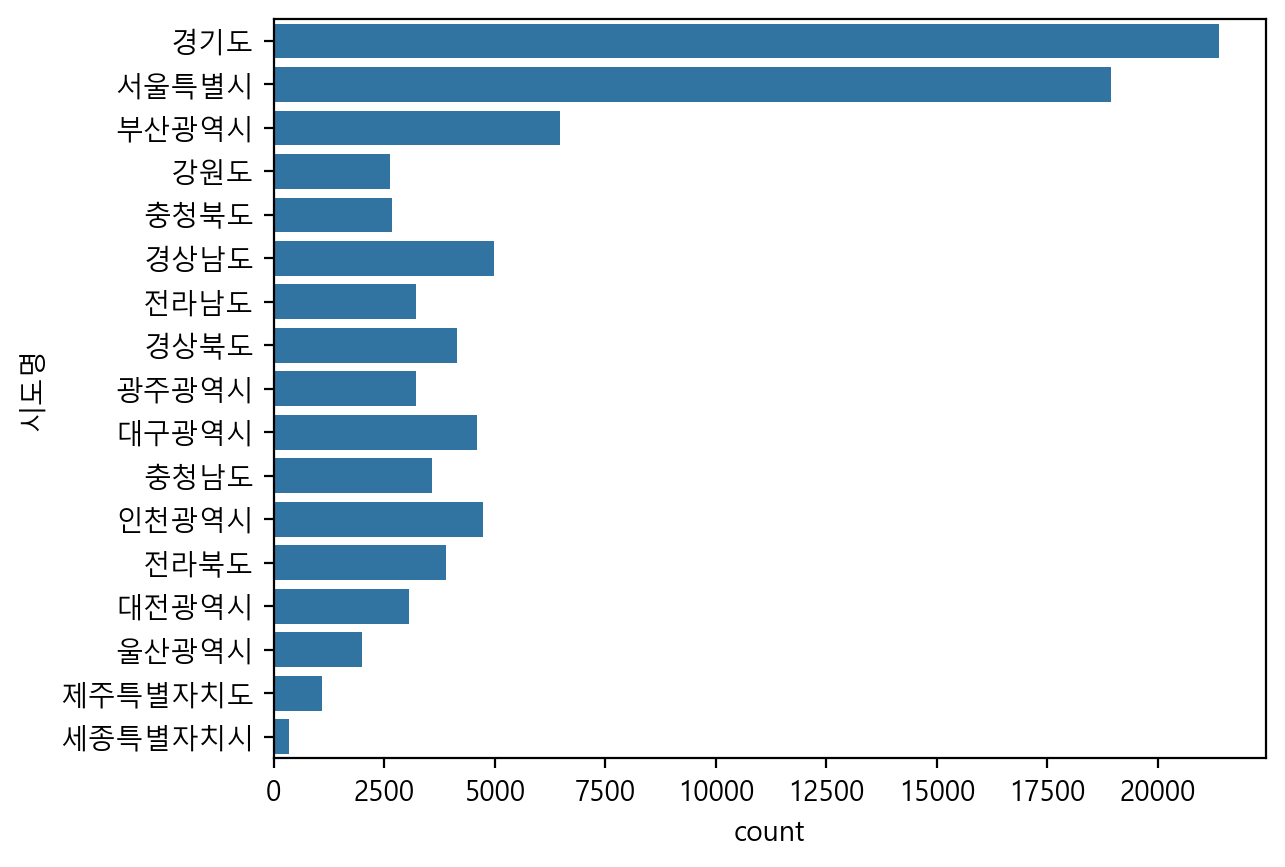

In [168]:
sns.countplot(data=df, y="시도명")

In [158]:
# "상권업종대분류명"으로 갯수를 세어봅니다.
df["상권업종대분류명"].value_counts()

상권업종대분류명
의료    91335
Name: count, dtype: int64

In [159]:
# "상권업종중분류명"으로 갯수를 세어봅니다.
df["상권업종중분류명"].value_counts()

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [160]:
# normalize=True 를 사용해 비율을 구해봅니다.
df["상권업종중분류명"].value_counts(normalize=True)

상권업종중분류명
병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: proportion, dtype: float64

<Axes: xlabel='상권업종중분류명'>

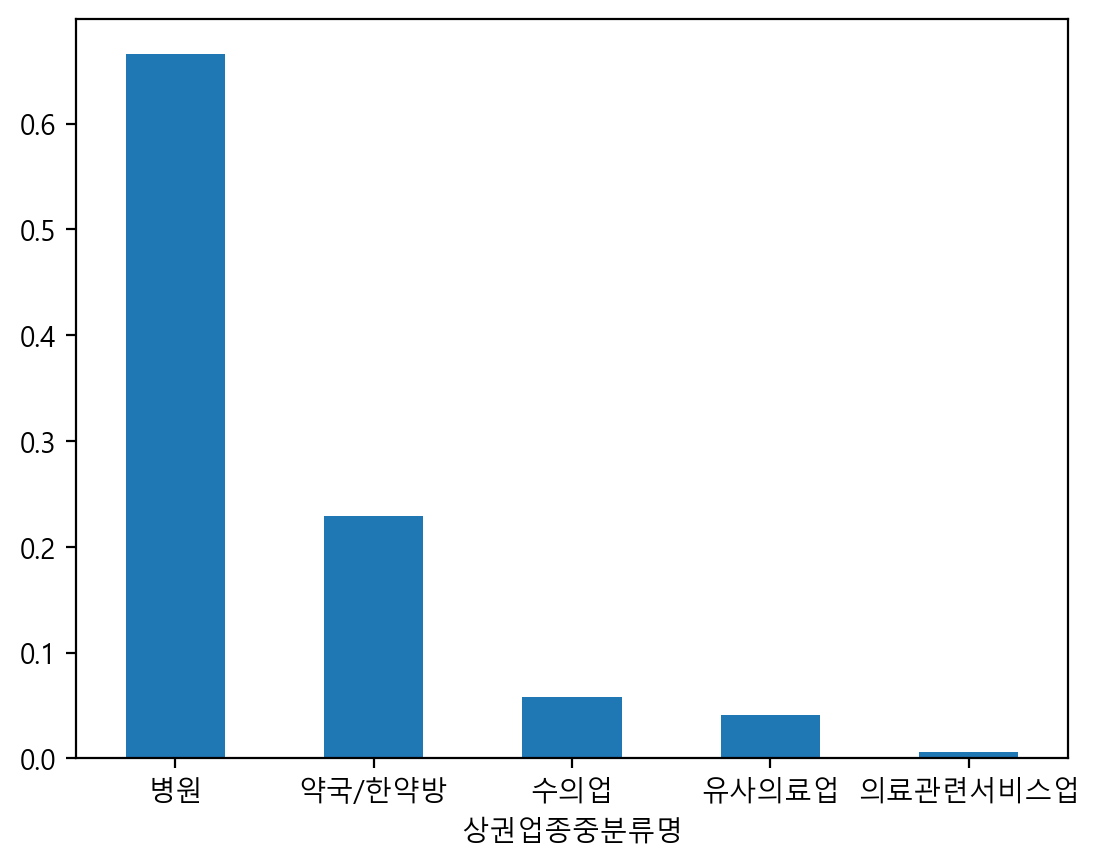

In [171]:
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다.
df["상권업종중분류명"].value_counts(normalize=True).plot.bar(rot=0)

<Axes: ylabel='proportion'>

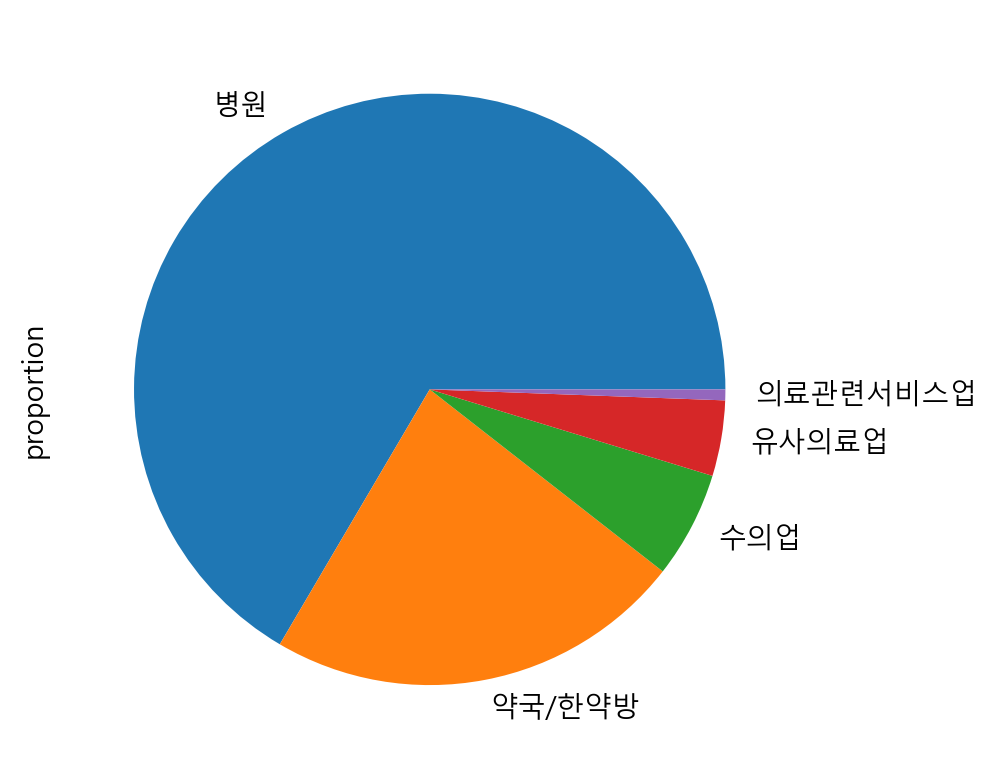

In [162]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려봅니다.
df["상권업종중분류명"].value_counts(normalize=True).plot.pie()

In [164]:
# "상권업종소분류명" 에 대한 그룹화 된 값을 카운트 합니다.
df["상권업종소분류명"].value_counts()

상권업종소분류명
약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: count, dtype: int64

<Axes: ylabel='상권업종소분류명'>

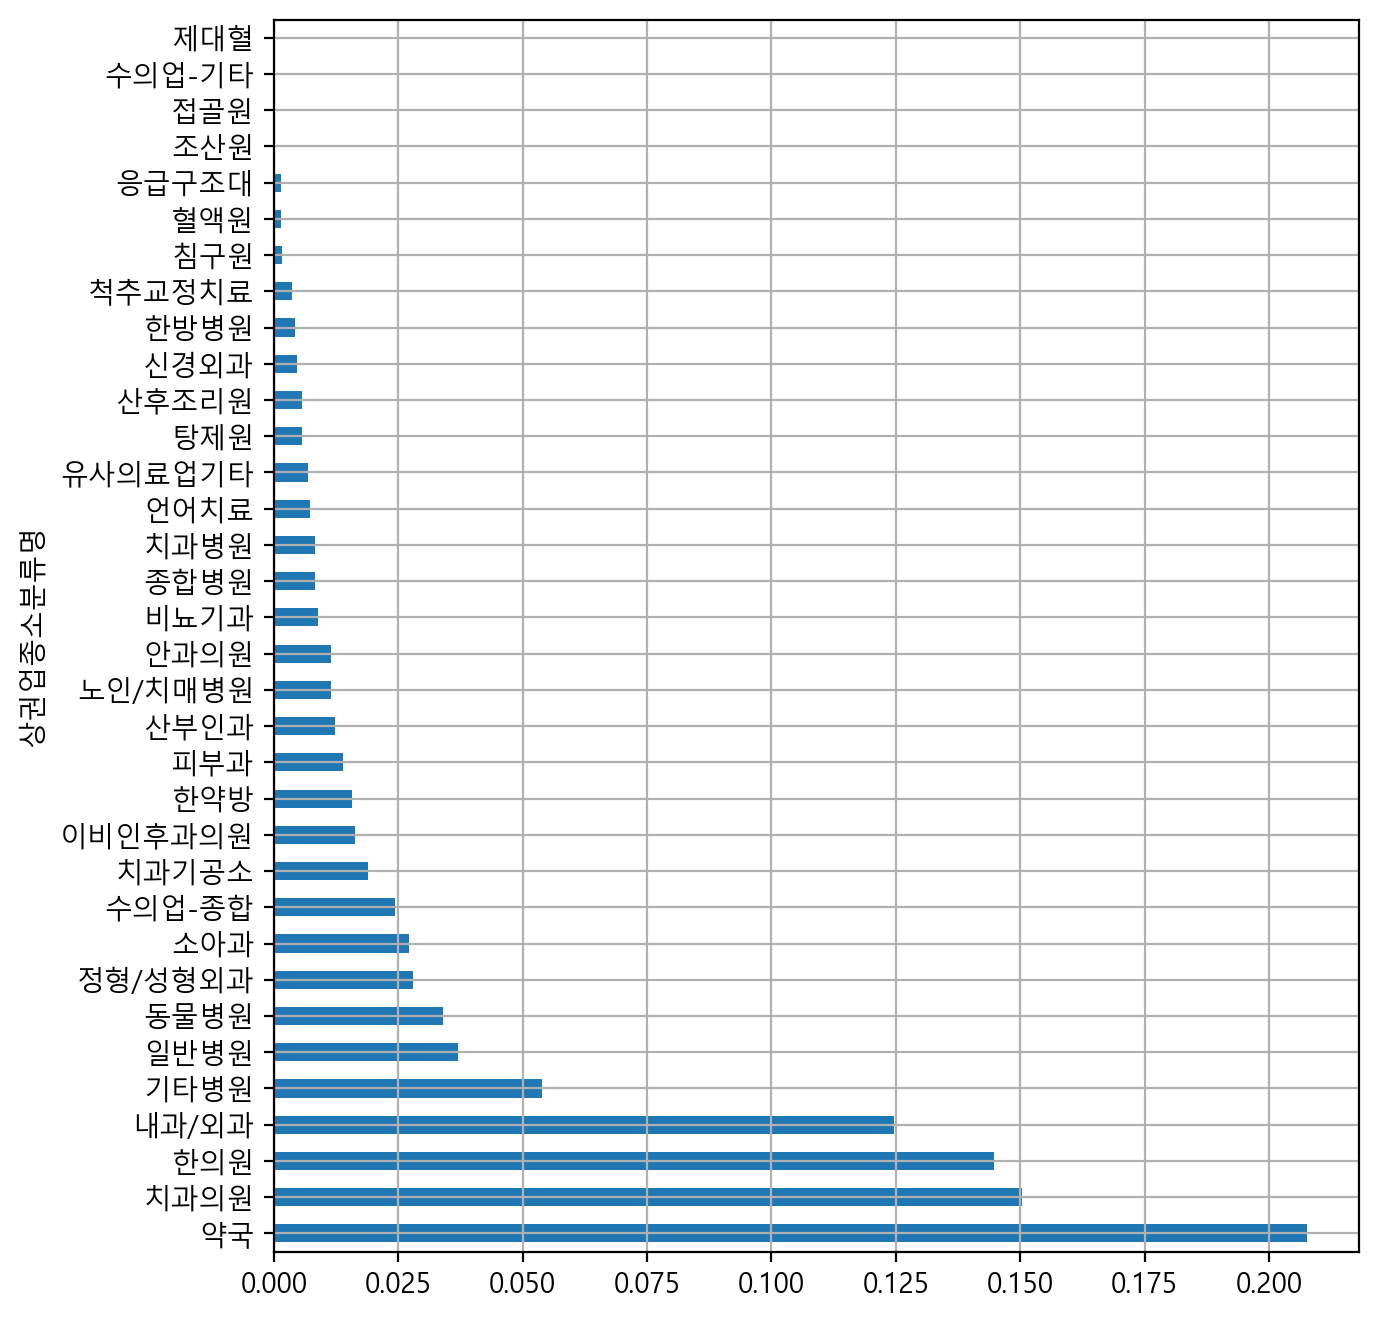

In [173]:
# "상권업종소분류명"으로 갯수를 세어봅니다.
# 판다스의 plot.bar()를 사용해서 막대그래프를 그려봅니다.
df["상권업종소분류명"].value_counts(normalize=True).plot.barh(figsize=(7,8), grid = True)

## 데이터 색인하기
* 특정 데이터만 모아서 따로 봅니다.

In [175]:
# "상권업종중분류명"이 "약국/한약방"인 데이터만 가져와서
# df_medical 이라는 변수에 담아봅니다.
# 그리고 head()를 통해 미리보기를 합니다.
df["상권업종중분류명"] == "약국/한약방"

0        False
1        False
2        False
3        False
4         True
         ...  
91330     True
91331    False
91332    False
91333    False
91334    False
Name: 상권업종중분류명, Length: 91335, dtype: bool

In [178]:
# "상권업종대분류명" 에서 "의료"만 가져옵니다.
# df.loc를 사용하면 행,열을 함께 가져올 수 있습니다.
# 이 기능을 통해 "상권업종중분류명" 만 가져옵니다.
# 그리고 가져온 결과를 value_counts 를 통해 중분류의 갯수를 세어봅니다.
# shop_type
df_medical = df[df["상권업종중분류명"] == "약국/한약방"].copy()

In [186]:
# 위와 똑같은 기능을 수행하는 코드입니다. 아래와 같이 한 줄에 표현할 수도 있습니다.
df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()


상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [190]:
# 유사의료업만 따로 모아봅니다.
df[df["상권업종중분류명"] == "유사의료업"].shape

(3774, 29)

In [193]:
# 상호명을 그룹화해서 갯수를 세어봅니다.
# value_counts 를 사용해서 상위 10개를 출력합니다.
df["상호명"].value_counts().head(10)

상호명
리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: count, dtype: int64

In [195]:
# 유사의료업만 df_medi 변수에 담겨져 있습니다.
# df_medi 변수에서 상호명으로 갯수를 세어봅니다.
# 가장 많은 상호 상위 10개를 출력해 봅니다.
df_medical["상호명"].value_counts().head(10)


상호명
온누리약국    149
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
하나약국      72
서울약국      71
Name: count, dtype: int64

### 여러 조건으로 색인하기

In [207]:
# "상권업종소분류명"이 "약국" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
# df_seoul_drug

df_seoul_drug = df[
    (df["상권업종소분류명"] == "약국") & 
    (df["시도명"]== "서울특별시")]
df_seoul_drug.head(1)

상가업소번호    상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명  \
33  20816709  이즈타워약         S       의료       S02   약국/한약방    S02A01       약국   

    시도코드    시도명  ...               지번주소         도로명코드             도로명  건물본번지  \
33  11.0  서울특별시  ...  서울특별시 강남구 역삼동 821  116803122010  서울특별시 강남구 테헤란로    101   

                       건물관리번호               도로명주소     구우편번호   신우편번호  \
33  1168010100108210001000001  서울특별시 강남구 테헤란로 101  135080.0  6134.0   

            경도         위도  
33  127.028023  37.498656  

[1 rows x 29 columns]

### 구별로 보기

In [214]:
# 위에서 색인한 데이터로 "시군구명"으로 그룹화 해서 갯수를 세어봅니다.
# 구별로 약국이 몇개가 있는지 확인해 봅니다.
c = df_seoul_drug["시군구명"].value_counts()
c.head()

시군구명
강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: count, dtype: int64

In [53]:
# normalize=True 를 통해 비율을 구해봅니다.


<Axes: xlabel='시군구명'>

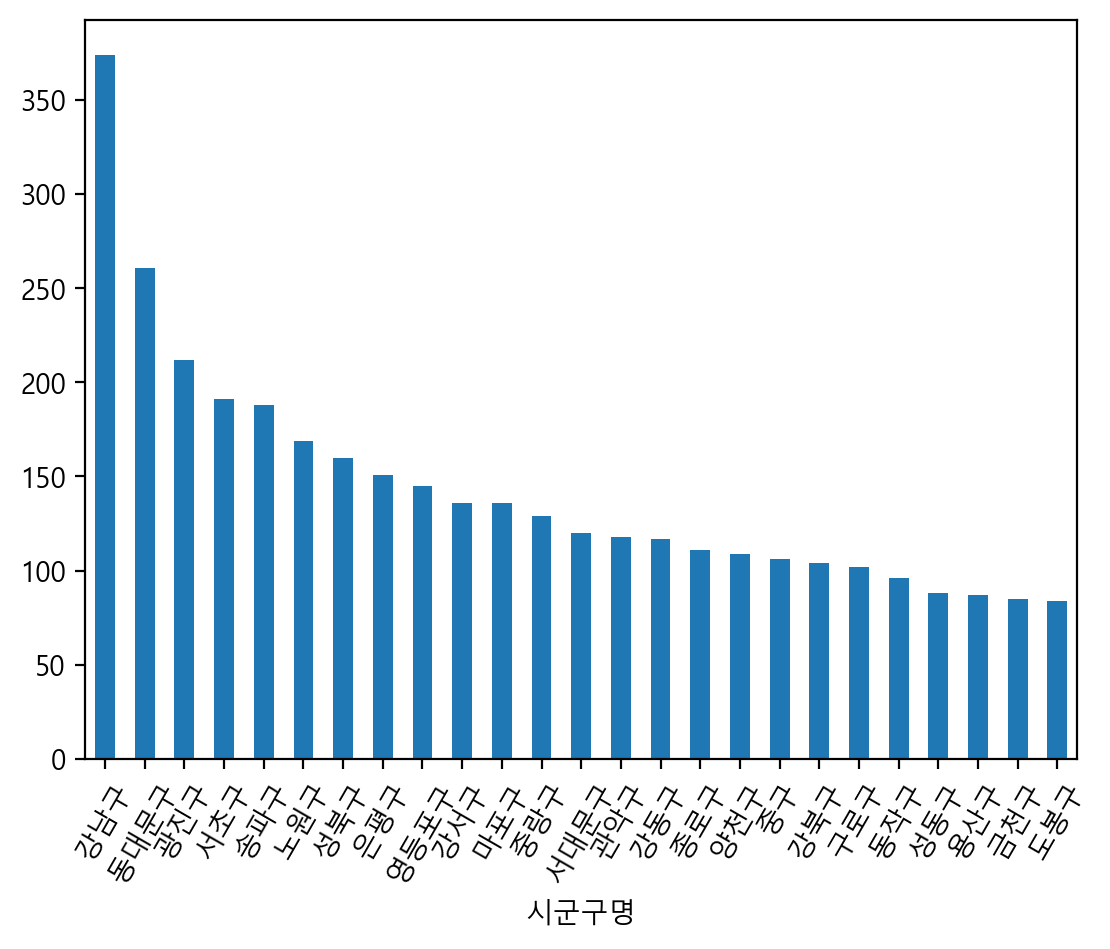

In [215]:
# 위에서 구한 결과를 판다스의 plot.bar()를 활용해 막대그래프로 그립니다.
c.plot.bar(rot=60)

In [216]:
# "상권업종소분류명"이 "종합병원" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
# df_seoul_hospital

df_seoul_hospital = df[
    (df["상권업종소분류명"] == "종합병원") & 
    (df["시도명"]== "서울특별시")]
df_seoul_hospital.head(1)

상가업소번호     상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
305  25155642  대진의료재단         S       의료       S01       병원    S01B01   

    상권업종소분류명  시도코드    시도명  ...                 지번주소         도로명코드  \
305     종합병원  11.0  서울특별시  ...  서울특별시 광진구 중곡동 58-25  112153104006   

                도로명  건물본번지                     건물관리번호               도로명주소  \
305  서울특별시 광진구 긴고랑로    119  1121510100100580025000733  서울특별시 광진구 긴고랑로 119   

        구우편번호   신우편번호          경도         위도  
305  143220.0  4944.0  127.088279  37.559048  

[1 rows x 29 columns]

In [217]:
# "시군구명" 으로 그룹화 해서 구별로 종합병원의 수를 세어봅니다.

df_seoul_hospital["시군구명"].value_counts()

시군구명
강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
도봉구      4
양천구      4
강북구      4
서대문구     4
성북구      3
성동구      2
구로구      2
금천구      2
노원구      2
동대문구     2
관악구      2
종로구      2
중랑구      2
강서구      2
마포구      1
동작구      1
용산구      1
은평구      1
Name: count, dtype: int64

### 텍스트 데이터 색인하기

In [219]:
# str.contains 를 사용해서 "상호명"에 "대학병원"이 들어가는 것을 가져와서 head()로 미리보기 합니다.
df[df["상호명"].str.contains("대학병원")].head(1)

상가업소번호       상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
193  23651380  동국대학병원일산         S       의료       S01       병원    S01B01   

    상권업종소분류명  시도코드  시도명  ...                  지번주소         도로명코드  \
193     종합병원  41.0  경기도  ...  경기도 고양시 일산동구 식사동 814  412853193010   

                  도로명  건물본번지                     건물관리번호                도로명주소  \
193  경기도 고양시 일산동구 동국로     27  4128510100108090004022480  경기도 고양시 일산동구 동국로 27   

        구우편번호    신우편번호          경도         위도  
193  410773.0  10326.0  126.805548  37.676425  

[1 rows x 29 columns]

In [220]:
# str.startswith 를 사용해 "서울"로 시작하는 도로명주소를 가져와서 head()로 미리보기 합니다.
df[df["도로명주소"].str.startswith("서울")].head(1)

상가업소번호       상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
1  20024149  타워광명내과의원         S       의료       S01       병원    S01B07   

  상권업종소분류명  시도코드    시도명  ...                  지번주소         도로명코드  \
1    내과/외과  11.0  서울특별시  ...  서울특별시 강남구 도곡동 467-14  116804166604   

                도로명  건물본번지                     건물관리번호                도로명주소  \
1  서울특별시 강남구 언주로30길     39  1168011800104670014000001  서울특별시 강남구 언주로30길 39   

      구우편번호   신우편번호          경도         위도  
1  135270.0  6292.0  127.053198  37.488742  

[1 rows x 29 columns]

In [221]:
# str.endswith를 사용해서 "상호명"이 "병원"으로 끝나는 데이터를 가져와서 head()로 미리보기 합니다.
df[df["상호명"].str.endswith("병원")].head(1)

상가업소번호     상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명  \
5  20809147  행신동물병원         S       의료       S04      수의업    S04A02     동물병원   

   시도코드  시도명  ...                    지번주소         도로명코드              도로명  \
5  41.0  경기도  ...  경기도 고양시 덕양구 행신동 647-14  412813192072  경기도 고양시 덕양구 행신로   

   건물본번지                     건물관리번호                도로명주소     구우편번호    신우편번호  \
5    147  4128112800106470014011094  경기도 고양시 덕양구 행신로 147  412220.0  10517.0   

           경도         위도  
5  126.831632  37.619309  

[1 rows x 29 columns]

### 특정 지역만 보기

In [222]:
# 서울에 있는 데이터의 위도와 경도를 봅니다.
# 결과를 df_seoul 이라는 데이터프레임에 저장합니다.
# 새로운 변수에 데이터프레임을 저장시 copy()를 사용합니다.
# df_seoul
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(18943, 29)

<Axes: xlabel='count', ylabel='시군구명'>

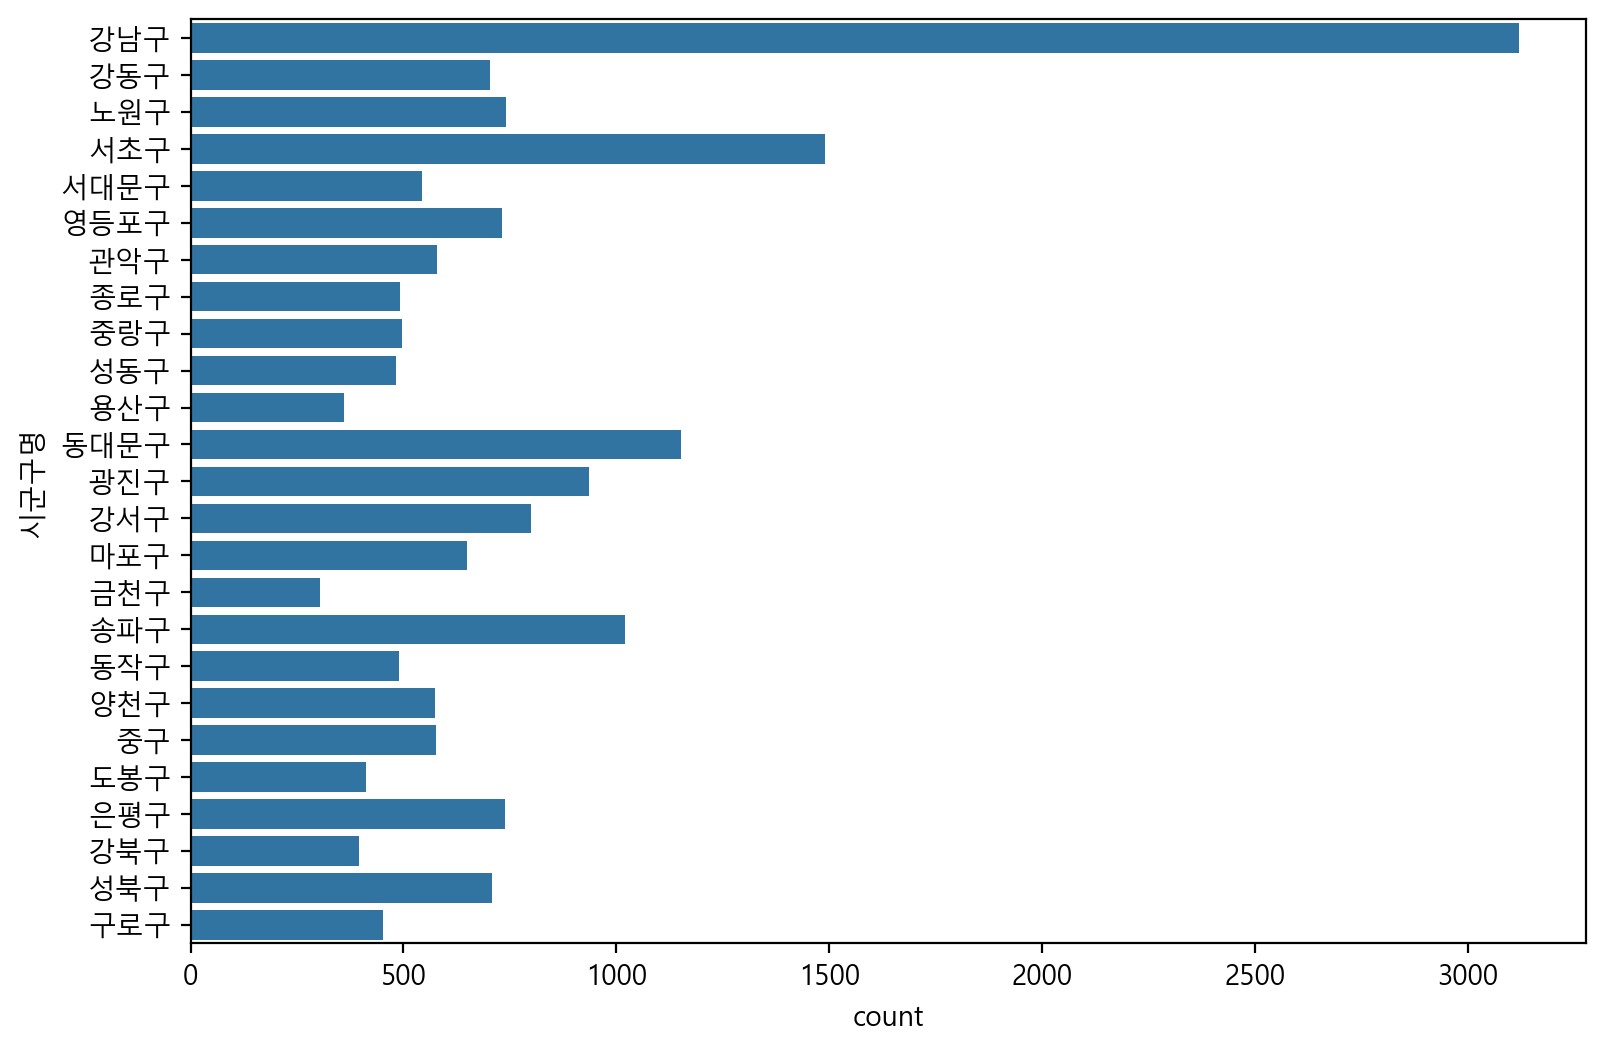

In [223]:
# seaborn 의 countplot 을 사용해서 위에서 만든 df_seoul 데이터프레임의
# 시군구명을 시각화 합니다.
plt.figure(figsize=(9, 6))
sns.countplot(data=df_seoul, y="시군구명")


<Axes: xlabel='경도', ylabel='위도'>

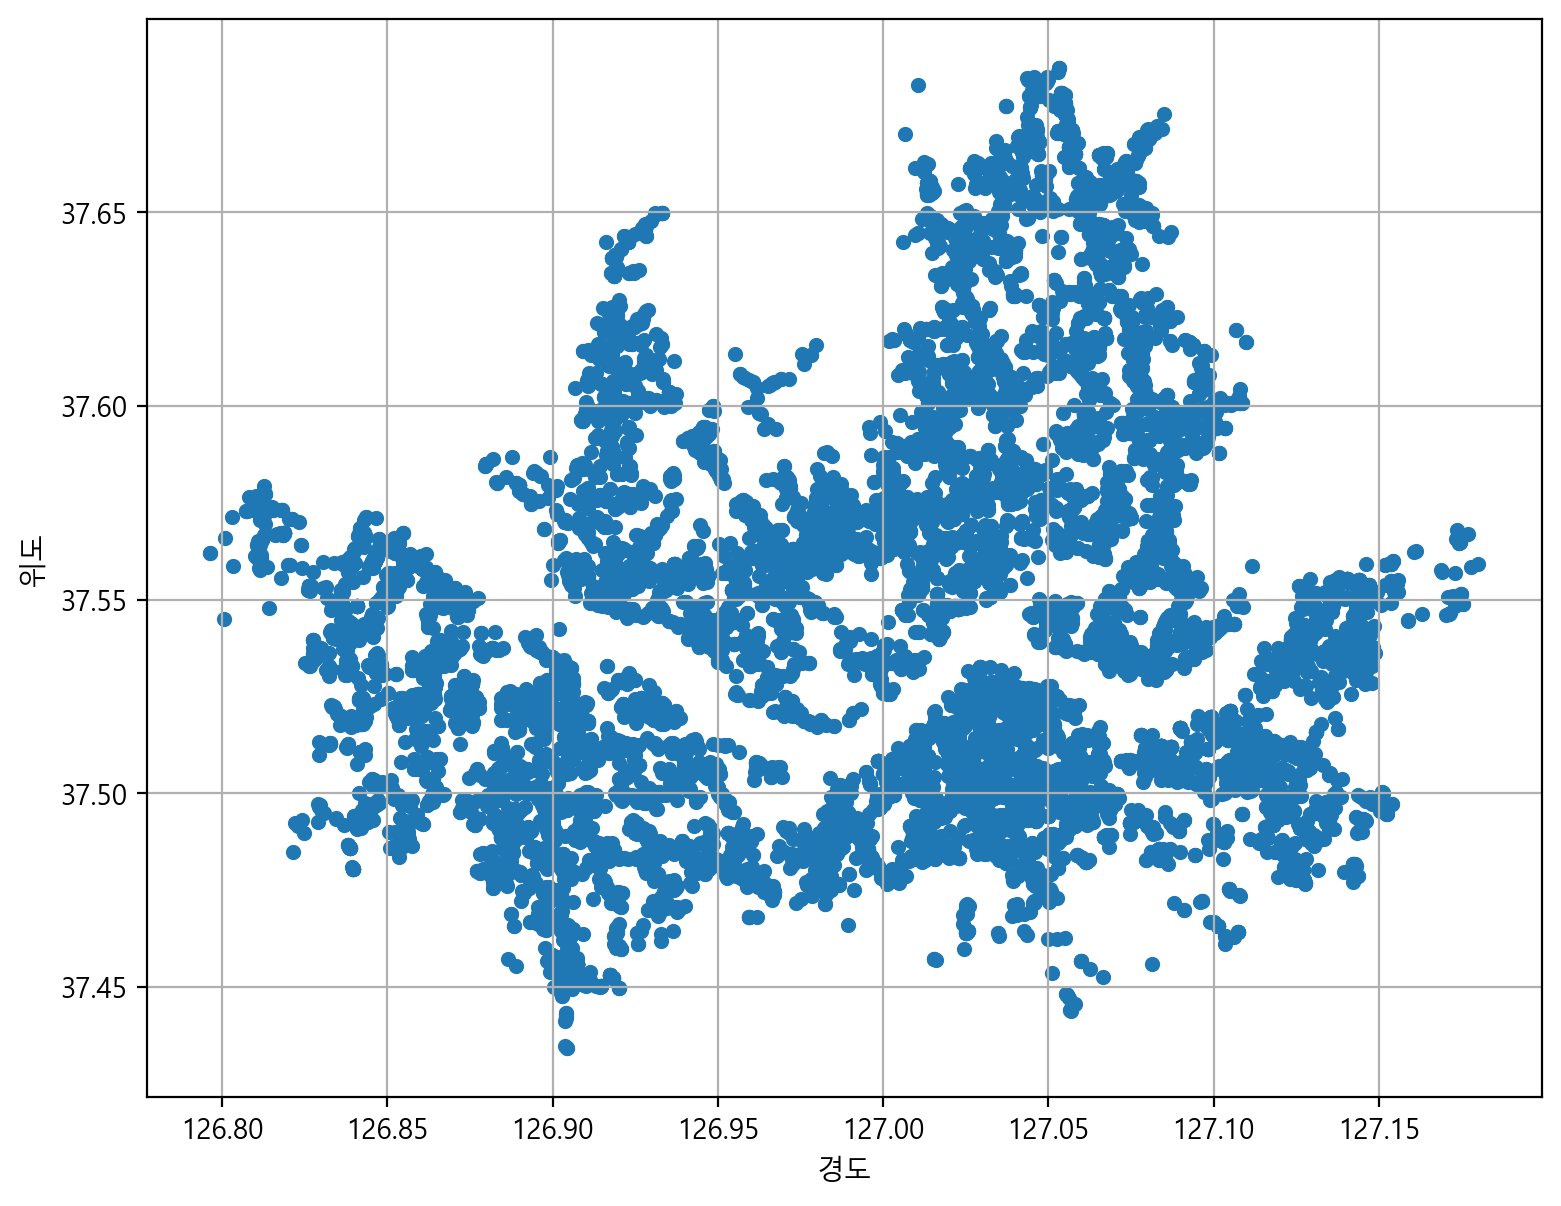

In [224]:
# Pandas 의 plot.scatter 를 통해 경도와 위도를 표시해 봅니다.
df_seoul[["경도", "위도", "시군구명"]].plot.scatter(
    x="경도", y="위도", figsize=(9, 7), grid=True)

<Axes: xlabel='경도', ylabel='위도'>

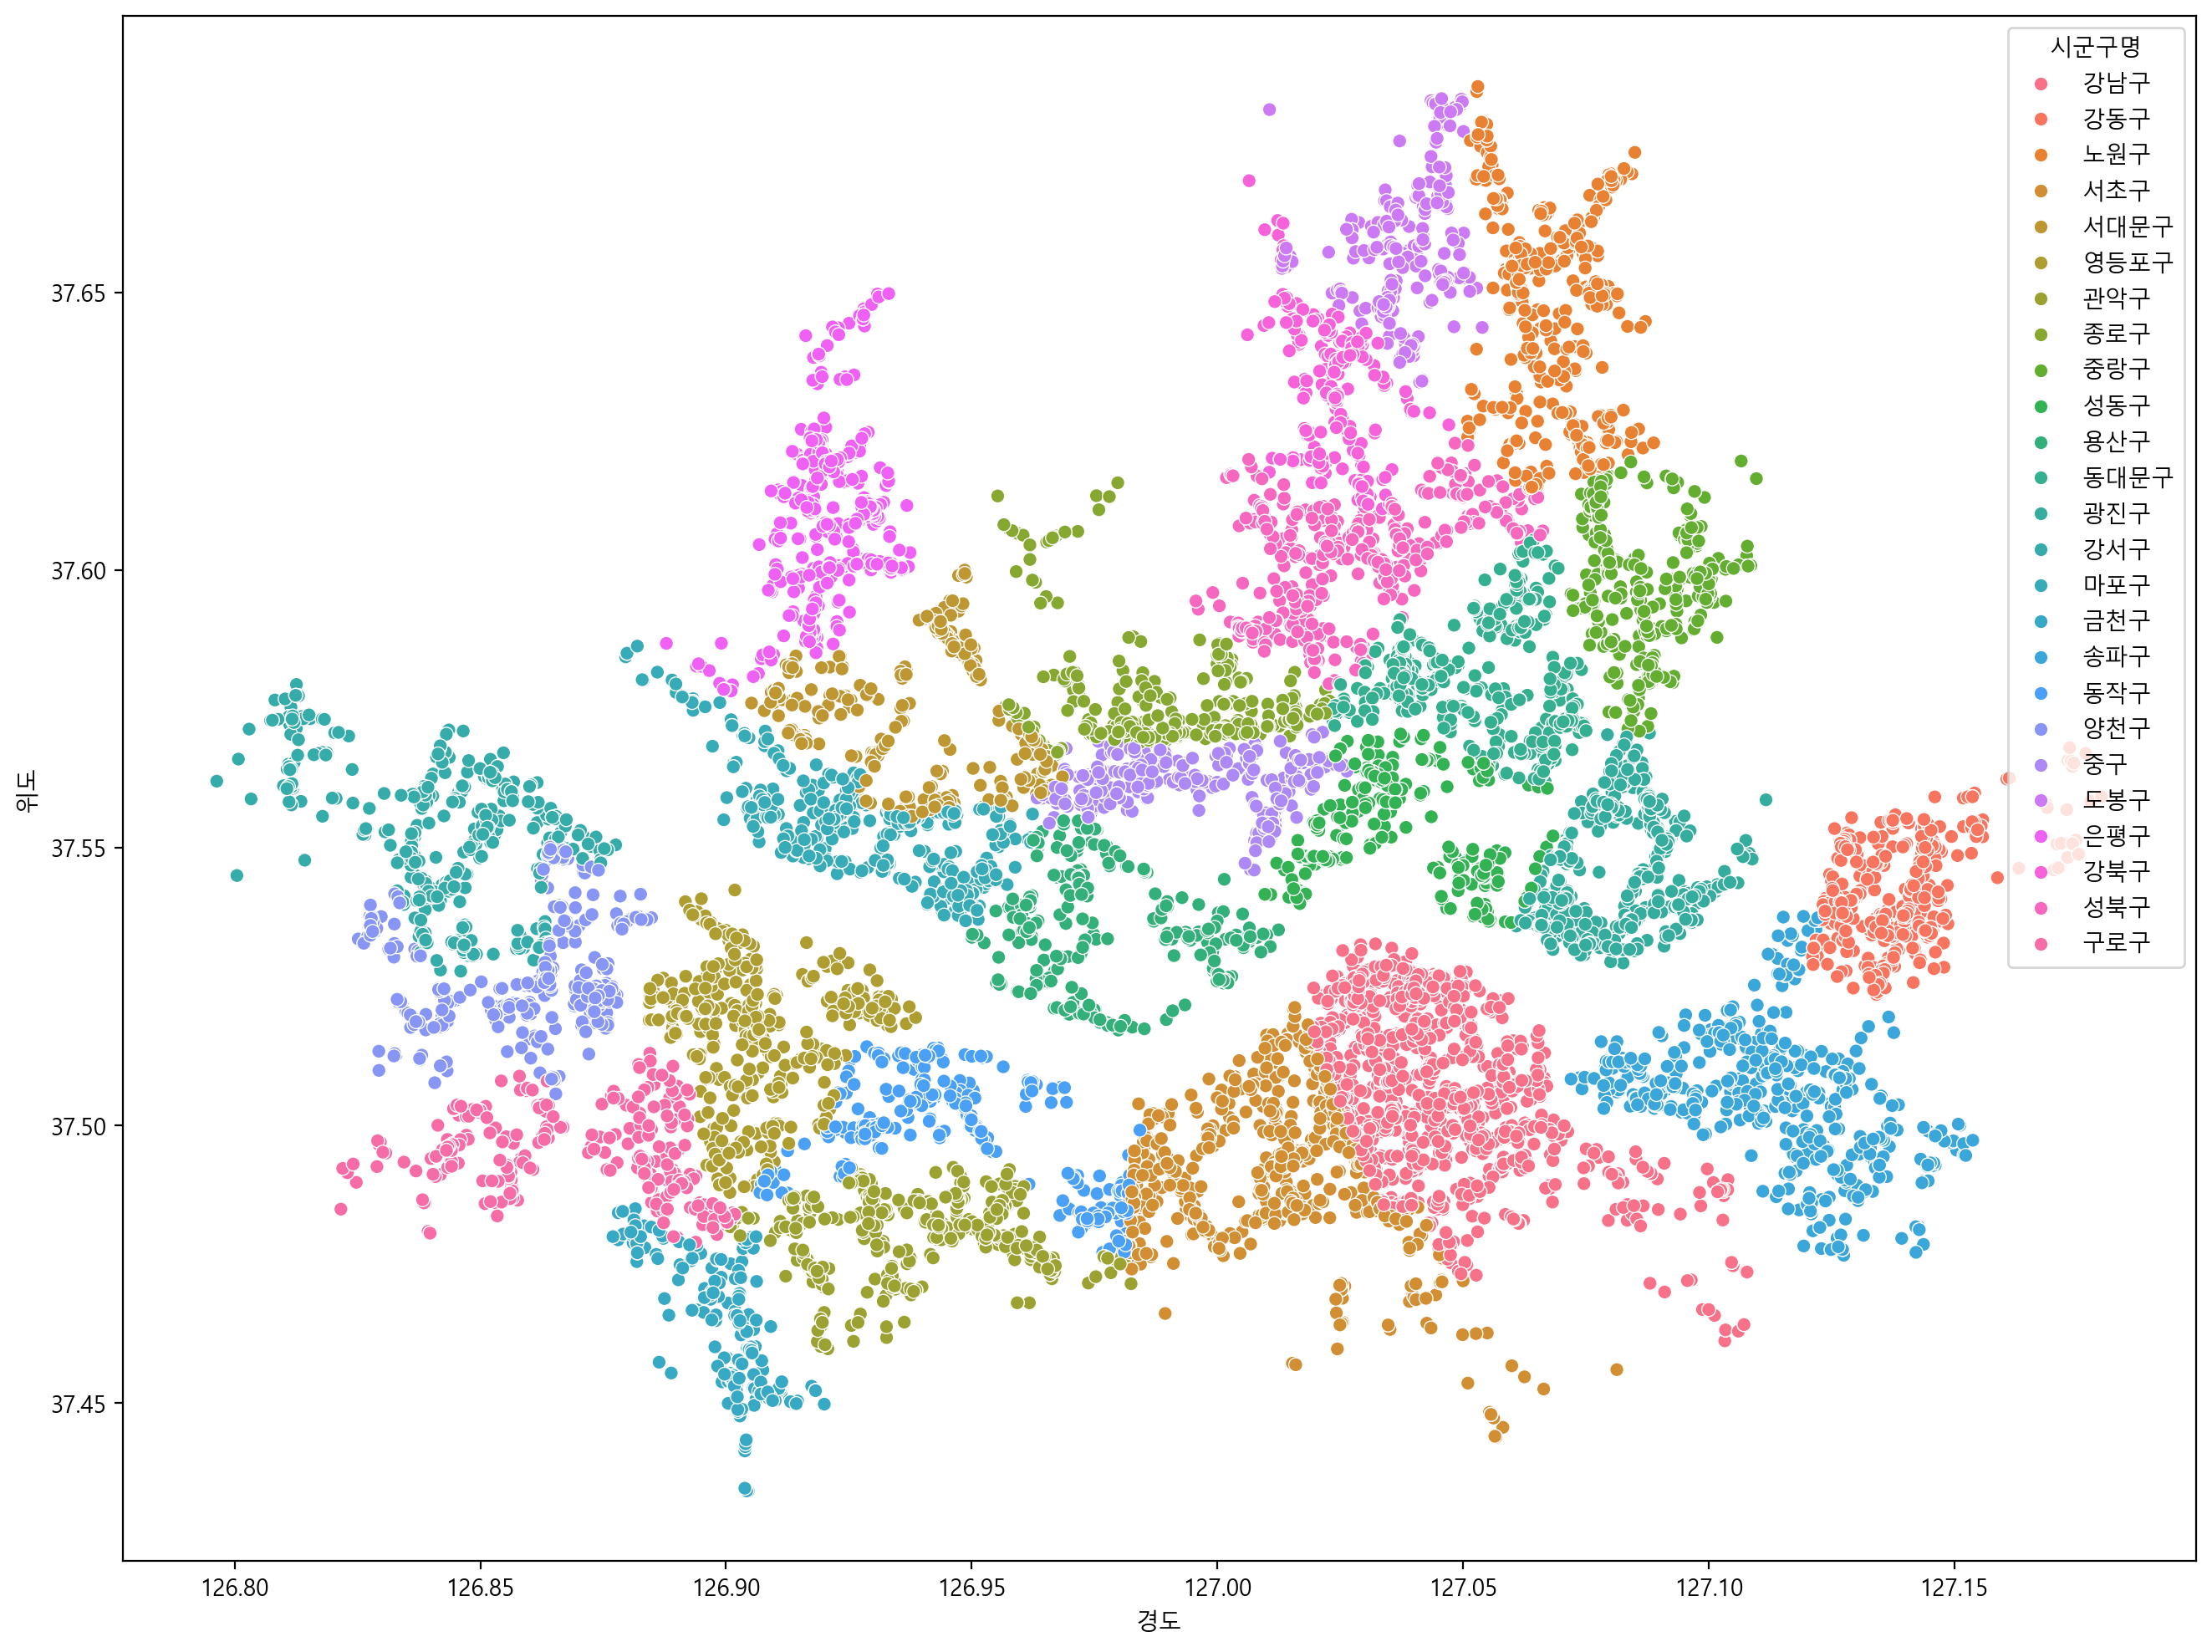

In [225]:
# seaborn의 scatterplot 을 통해 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_seoul, 
                x='경도', y='위도', hue='시군구명')


<Axes: xlabel='경도', ylabel='위도'>

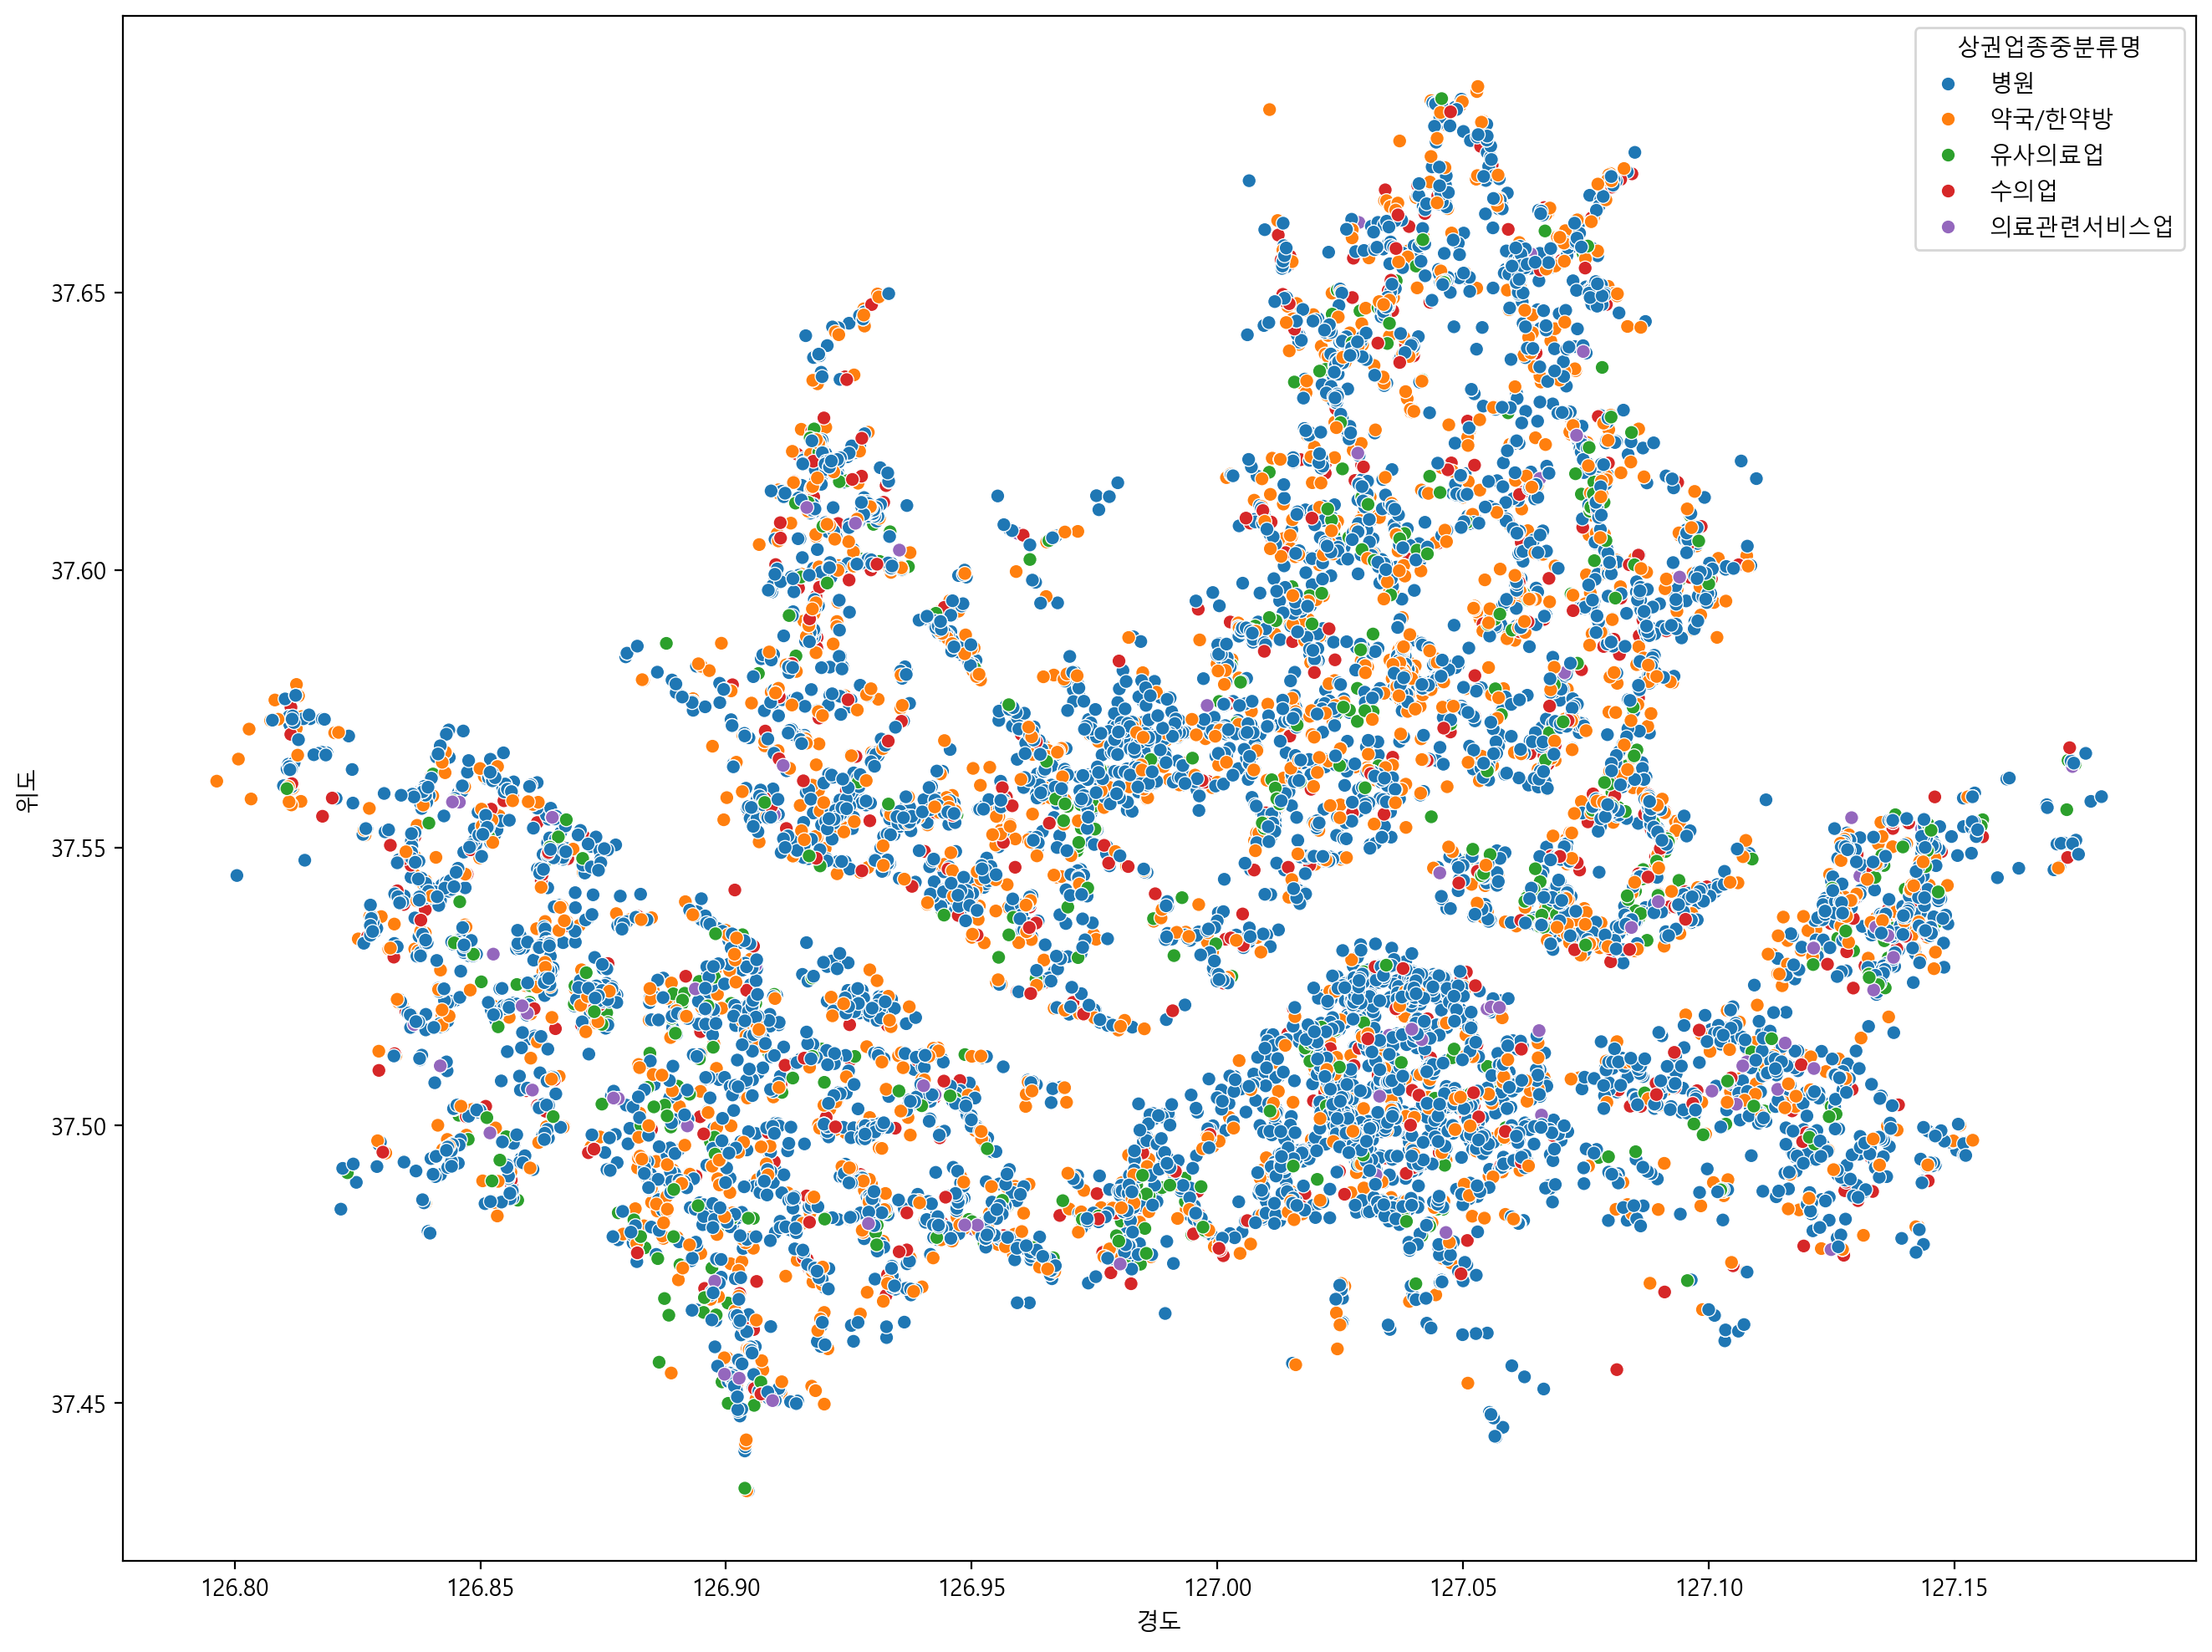

In [226]:
# seaborn의 scatterplot 을 통해 "상권업종중분류명" 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_seoul, 
                x='경도', y='위도', hue="상권업종중분류명")


<Axes: xlabel='경도', ylabel='위도'>

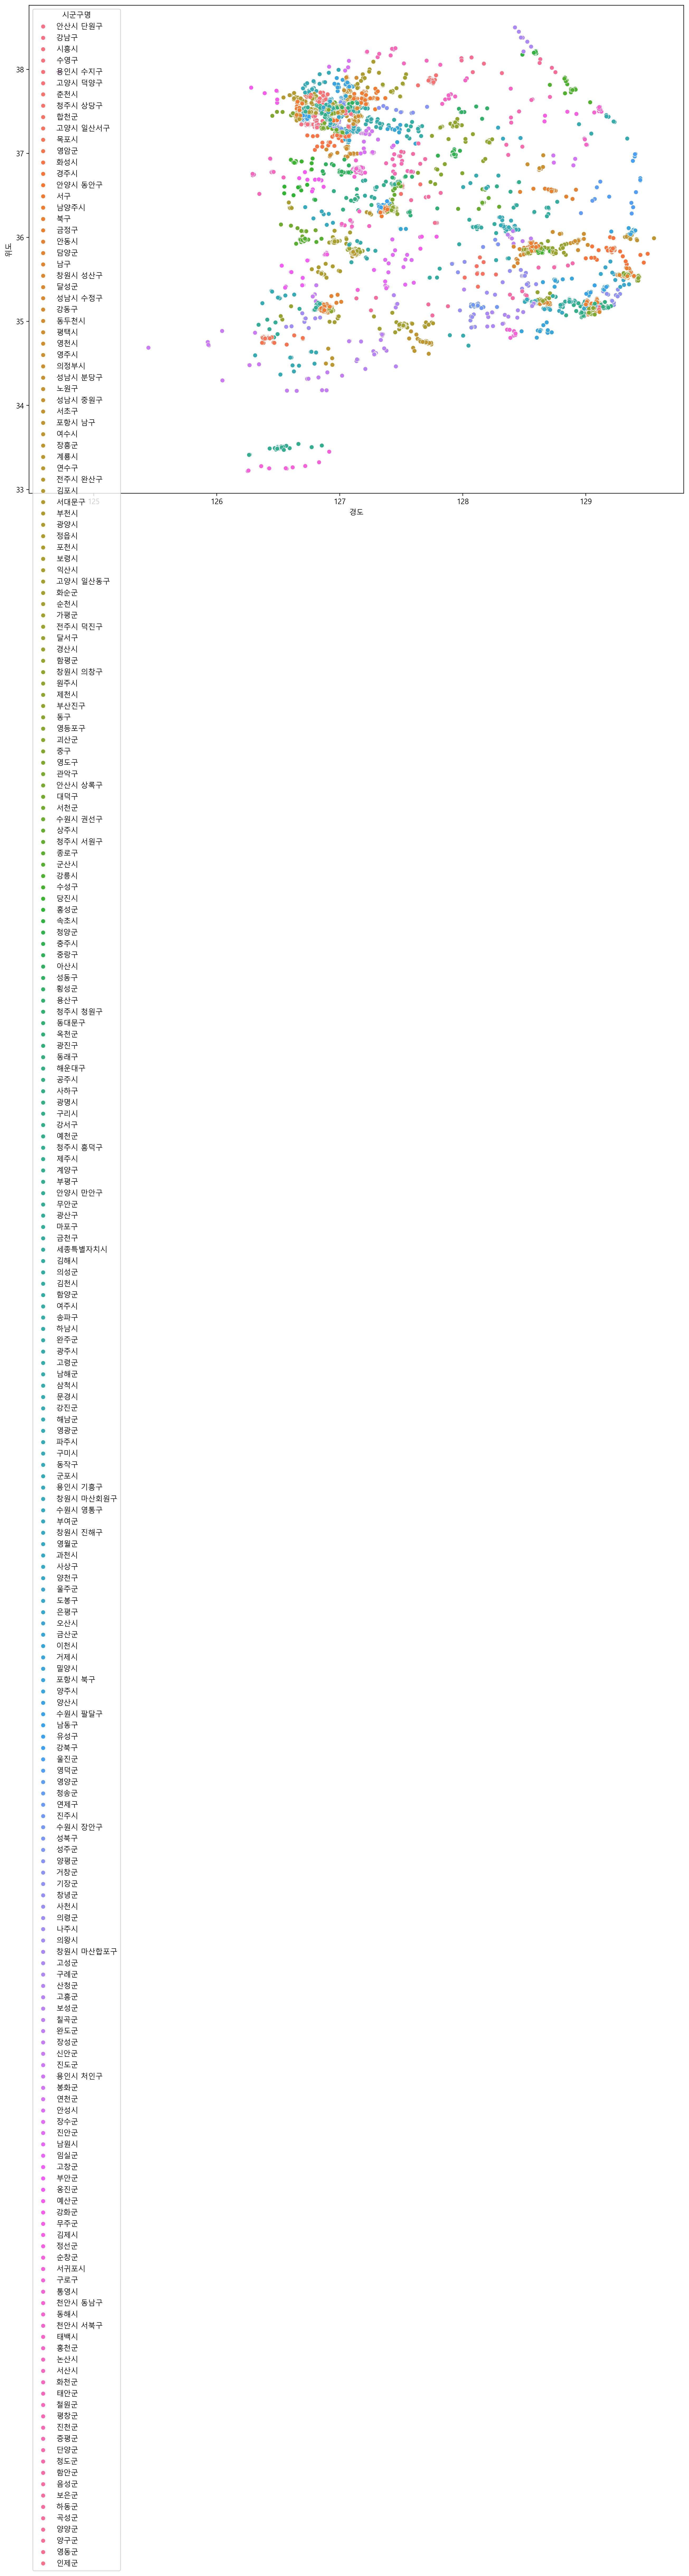

In [227]:
# seaborn의 scatterplot 을 통해 전국 데이터(df)로 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df[:10000], 
                x='경도', y='위도', hue='시군구명')



## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://t1.daumcdn.net/cfile/tistory/99576B4A5B751DC902">

검은색 프롬프트 창에 아래 명령어를 통해 folium 을 설치합니다.


`conda install -c conda-forge folium`

### Folium 사용예제
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/main/examples/


In [228]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium
# 지도 시각화를 위한 라이브러리
import folium


In [229]:
# geo_df 에 df_seoul_hospital 을 copy() 로 복사해서 할당합니다.
geo_df = df_seoul_hospital.copy()


In [230]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다.
fmap = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    # 상호명과 주소를 붙여서 출력되도록 합니다.
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    
    folium.Marker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        popup=popup_name, 
        tooltip=popup_name
    ).add_to(fmap)


fmap

## 좀 더 분석해 보기
* 상권업종중분류명, 상권업종소분류명 중에 관심 있는 분류명을 색인 후에 시도별, 시군구별 분석을 해보세요.
* 예시)
    * 언어치료는 시군구별로 어디에 많이 위치할까?
    * 의료시설은 서울과 강남에 집중되어 있을까?
    * 강남에는 피부과, 성형외과가 다른 지역에 비해 많을까?

In [252]:
#언어치료는 시군구별로 어디에 많이 위치할까
map_lan = df[(df["상권업종중분류명"] == "유사의료업")&(df["상권업종소분류명"]=="언어치료")&(df["시도명"]== "서울특별시")] 
map_lan
# l = map_lan["시군구명"].value_counts()
# l.plot.bar()

상가업소번호           상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
430    20861641      서울언어치료센터         S       의료       S03    유사의료업    S03B07   
481    20901857     한국아동발달연구소         S       의료       S03    유사의료업    S03B07   
1371   21889772      구로아동발달센터         S       의료       S03    유사의료업    S03B07   
1632   22371338   연세언어치료교육연구원         S       의료       S03    유사의료업    S03B07   
1768   22367236  아이라라심리언어발달센터         S       의료       S03    유사의료업    S03B07   
...         ...           ...       ...      ...       ...      ...       ...   
90451  16233251     라니아동발달연구소         S       의료       S03    유사의료업    S03B07   
90559  16340661    은평햇살아동발달센터         S       의료       S03    유사의료업    S03B07   
90756  16183232       아이마인드의원         S       의료       S03    유사의료업    S03B07   
90939  16366418     라니아동발달연구소         S       의료       S03    유사의료업    S03B07   
90940  16365751     아동청소년보호협회         S       의료       S03    유사의료업    S03B07   

      상권업종소분류명  시도코드    시도명  ...                    지번주소         도로명코드  \
430       언어치료  11.0  서울특별시  ...     서울특별시 송파구 송파동 95-55  117103123001   
481       언어치료  11.0  서울특별시  ...     서울특별시 노원구 상계동 173-1  113503110009   
1371      언어치료  11.0  서울특별시  ...     서울특별시 구로구 오류동 33-33  115303000028   
1632      언어치료  11.0  서울특별시  ...    서울특별시 성북구 길음동 1243-1  112903005041   
1768      언어치료  11.0  서울특별시  ...     서울특별시 강서구 가양동 14-51  115003005069   
...        ...   ...    ...  ...                     ...           ...   
90451     언어치료  11.0  서울특별시  ...  서울특별시 용산구 이태원동 258-227  111704106486   
90559     언어치료  11.0  서울특별시  ...    서울특별시 은평구 신사동 336-14  113803005056   
90756     언어치료  11.0  서울특별시  ...        서울특별시 송파구 잠실동 22  117103123023   
90939     언어치료  11.0  서울특별시  ...   서울특별시 서초구 서초동 1658-29  116504163705   
90940     언어치료  11.0  서울특별시  ...  서울특별시 영등포구 문래동3가 54-37  115604154224   

                      도로명  건물본번지                     건물관리번호  \
430         서울특별시 송파구 가락로    139  1171010400100950055013236   
481       서울특별시 노원구 한글비석로    396  1135010500101730001001304   
1371        서울특별시 구로구 경인로    240  1153010800100330019000001   
1632        서울특별시 성북구 삼양로     35  1129013400112430001025950   
1768        서울특별시 강서구 화곡로    429  1150010400100180038009661   
...                   ...    ...                        ...   
90451  서울특별시 용산구 회나무로13가길     57  1117013000102580227007914   
90559       서울특별시 은평구 증산로    395  1138010900103360014000001   
90756      서울특별시 송파구 올림픽로    135  1171010100100220000000509   
90939  서울특별시 서초구 서초중앙로20길     33  1165010800116280029023789   
90940  서울특별시 영등포구 도림로126길     11  1156012100100540037023984   

                          도로명주소     구우편번호   신우편번호          경도         위도  
430         서울특별시 송파구 가락로 139-1  138170.0  5668.0  127.111360  37.502574  
481         서울특별시 노원구 한글비석로 396  139748.0  1663.0  127.073564  37.662292  
1371          서울특별시 구로구 경인로 240  152100.0  8270.0  126.847545  37.497466  
1632           서울특별시 성북구 삼양로 35  136110.0  2725.0  127.023748  37.606233  
1768          서울특별시 강서구 화곡로 429  157200.0  7526.0  126.855048  37.561467  
...                         ...       ...     ...         ...        ...  
90451     서울특별시 용산구 회나무로13가길 57  140856.0  4344.0  126.992824  37.540999  
90559      서울특별시 은평구 증산로 395-16  122891.0  3442.0  126.912854  37.591811  
90756        서울특별시 송파구 올림픽로 135  138911.0  5502.0  127.089869  37.516729  
90939  서울특별시 서초구 서초중앙로20길 33-17  137881.0  6634.0  127.015469  37.492659  
90940     서울특별시 영등포구 도림로126길 11  150834.0  7299.0  126.897400  37.514052  

[93 rows x 29 columns]

In [249]:
lmap = folium.Map(location=[map_lan['위도'].mean(), map_lan['경도'].mean()], 
                 zoom_start=12)

for n in map_lan.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    # 상호명과 주소를 붙여서 출력되도록 합니다.
    popup_name = map_lan.loc[n, '상호명'] + ' - ' + map_lan.loc[n, '도로명주소']
    
    folium.Marker(
        location=[map_lan.loc[n,'위도'], map_lan.loc[n, '경도']],
        popup=popup_name, 
        tooltip=popup_name
    ).add_to(lmap)


fmap